### Q1. Perform Exploratory Data Analysis (EDA) tasks

<br>a) Visualize the 10 random rows of the data set
<br>b) Generate the description for numeric variables
<br>c) Check the shape of the data set
<br>d) Generate the correlation matrix
<br>e) Generate a correlogram

In [53]:
import pandas as pd
data=pd.read_csv(r"C:\Users\HP\Downloads\admission.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


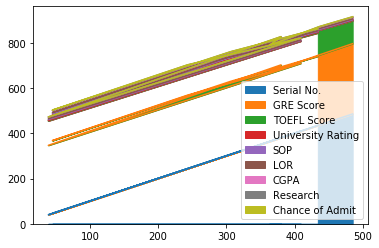

In [27]:
import matplotlib.pyplot as plt
row=data.sample(n=10)
row.plot.area()

In [28]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [30]:
data.shape

(500, 9)

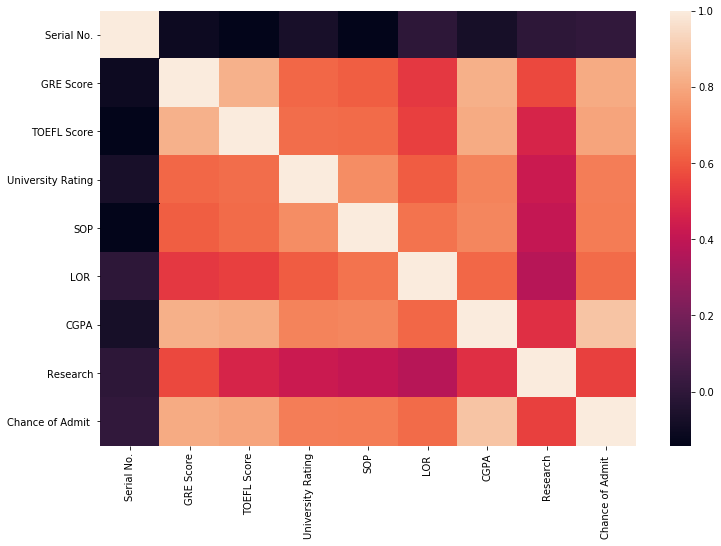

In [33]:
corr=data.corr()
fig,ax=plt.subplots(figsize=(12,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,ax=ax)

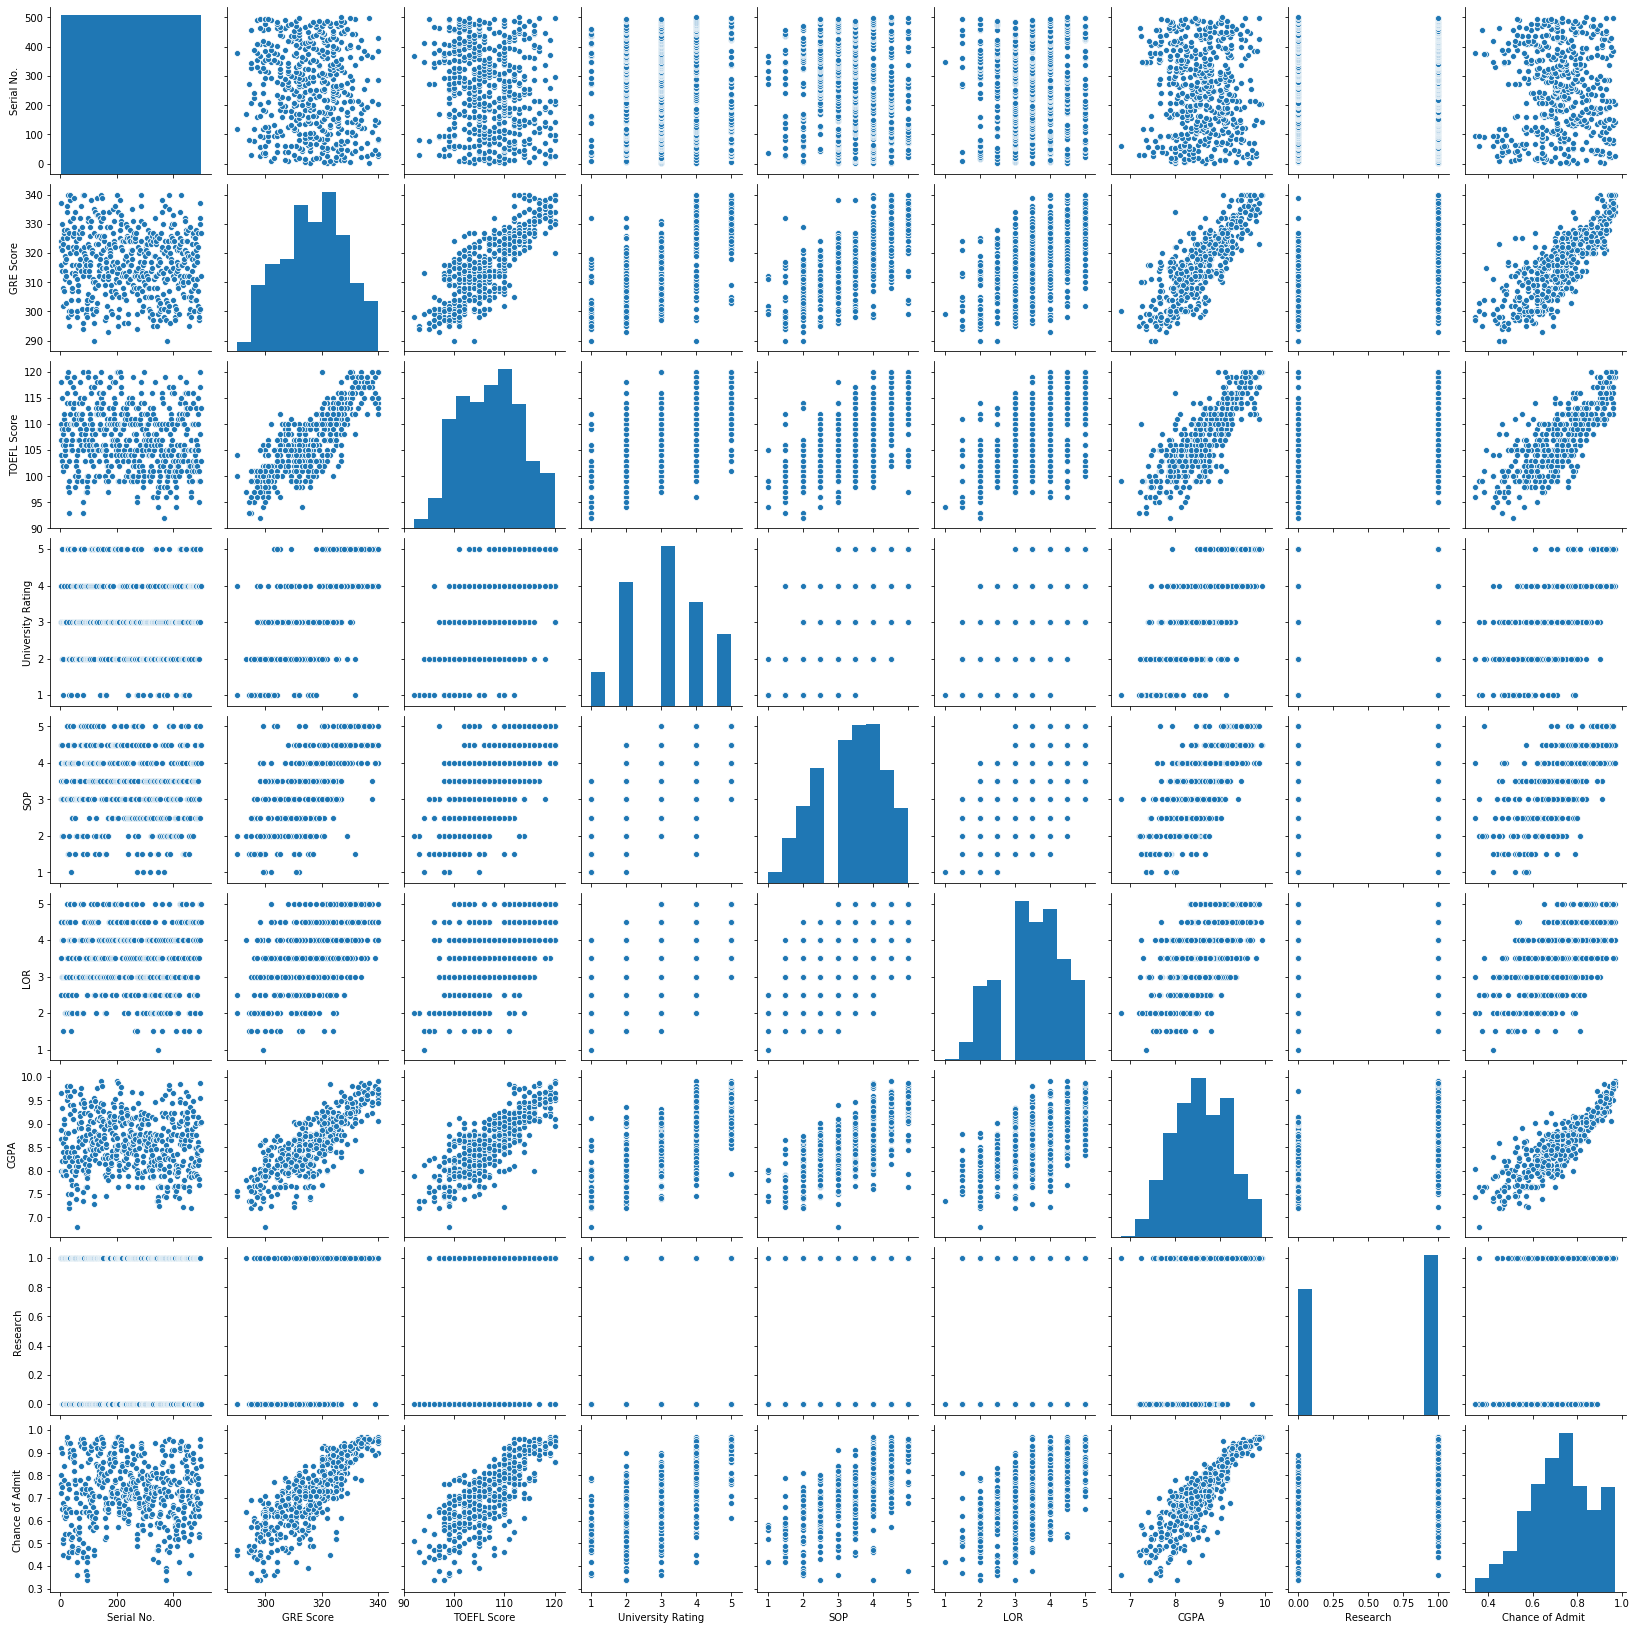

In [36]:
sns.pairplot(data)

### Q.2 Find out the minimum and maximum values for GRE score


In [42]:
import numpy as np
mini=data['GRE Score'].min()
maxi=data['GRE Score'].max()
print("Min Value",mini)
print("Max Value",maxi)

Min Value 290
Max Value 340


### Q.3 Find out the percentage of universities for each university rating

### Q.4 Convert the target variable “Chance of Admit” to categorical having values 0 and 1,such that :
<br>Students having the “Chance of Admit” value &gt; 0.80, are assigned value 1, and
<br>Students having the “Chance of Admit” value &lt; 0.80, are assigned value 0
<br>Where 0: Low chance of Admission and 1: High chance of admission

In [65]:
for i in data.iloc[:,8]:
    if i>0.80:
        j=1
        data.replace(i,j,inplace=True)
    else:
        j=0
        data.replace(i,j,inplace=True)
  

In [66]:
data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,0.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,0.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0
5,6,330,115,5,4.5,3.0,9.34,1,1.0
6,7,321,109,3,3.0,4.0,8.20,1,0.0
7,8,308,101,2,3.0,4.0,7.90,0,0.0
8,9,302,102,1,2.0,1.5,8.00,0,0.0
9,10,323,108,3,3.5,3.0,8.60,0,0.0


### Q.5 Build a Decision Tree classifier, to predict whether a student has a low or high chance of admission to a chosen university. Perform Hyperparameter Tuning to improve the accuracy of the model.

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

x=data.drop(['Chance of Admit '],axis=1)
y=data['Chance of Admit ']

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [76]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.97
[[76  2]
 [ 1 21]]


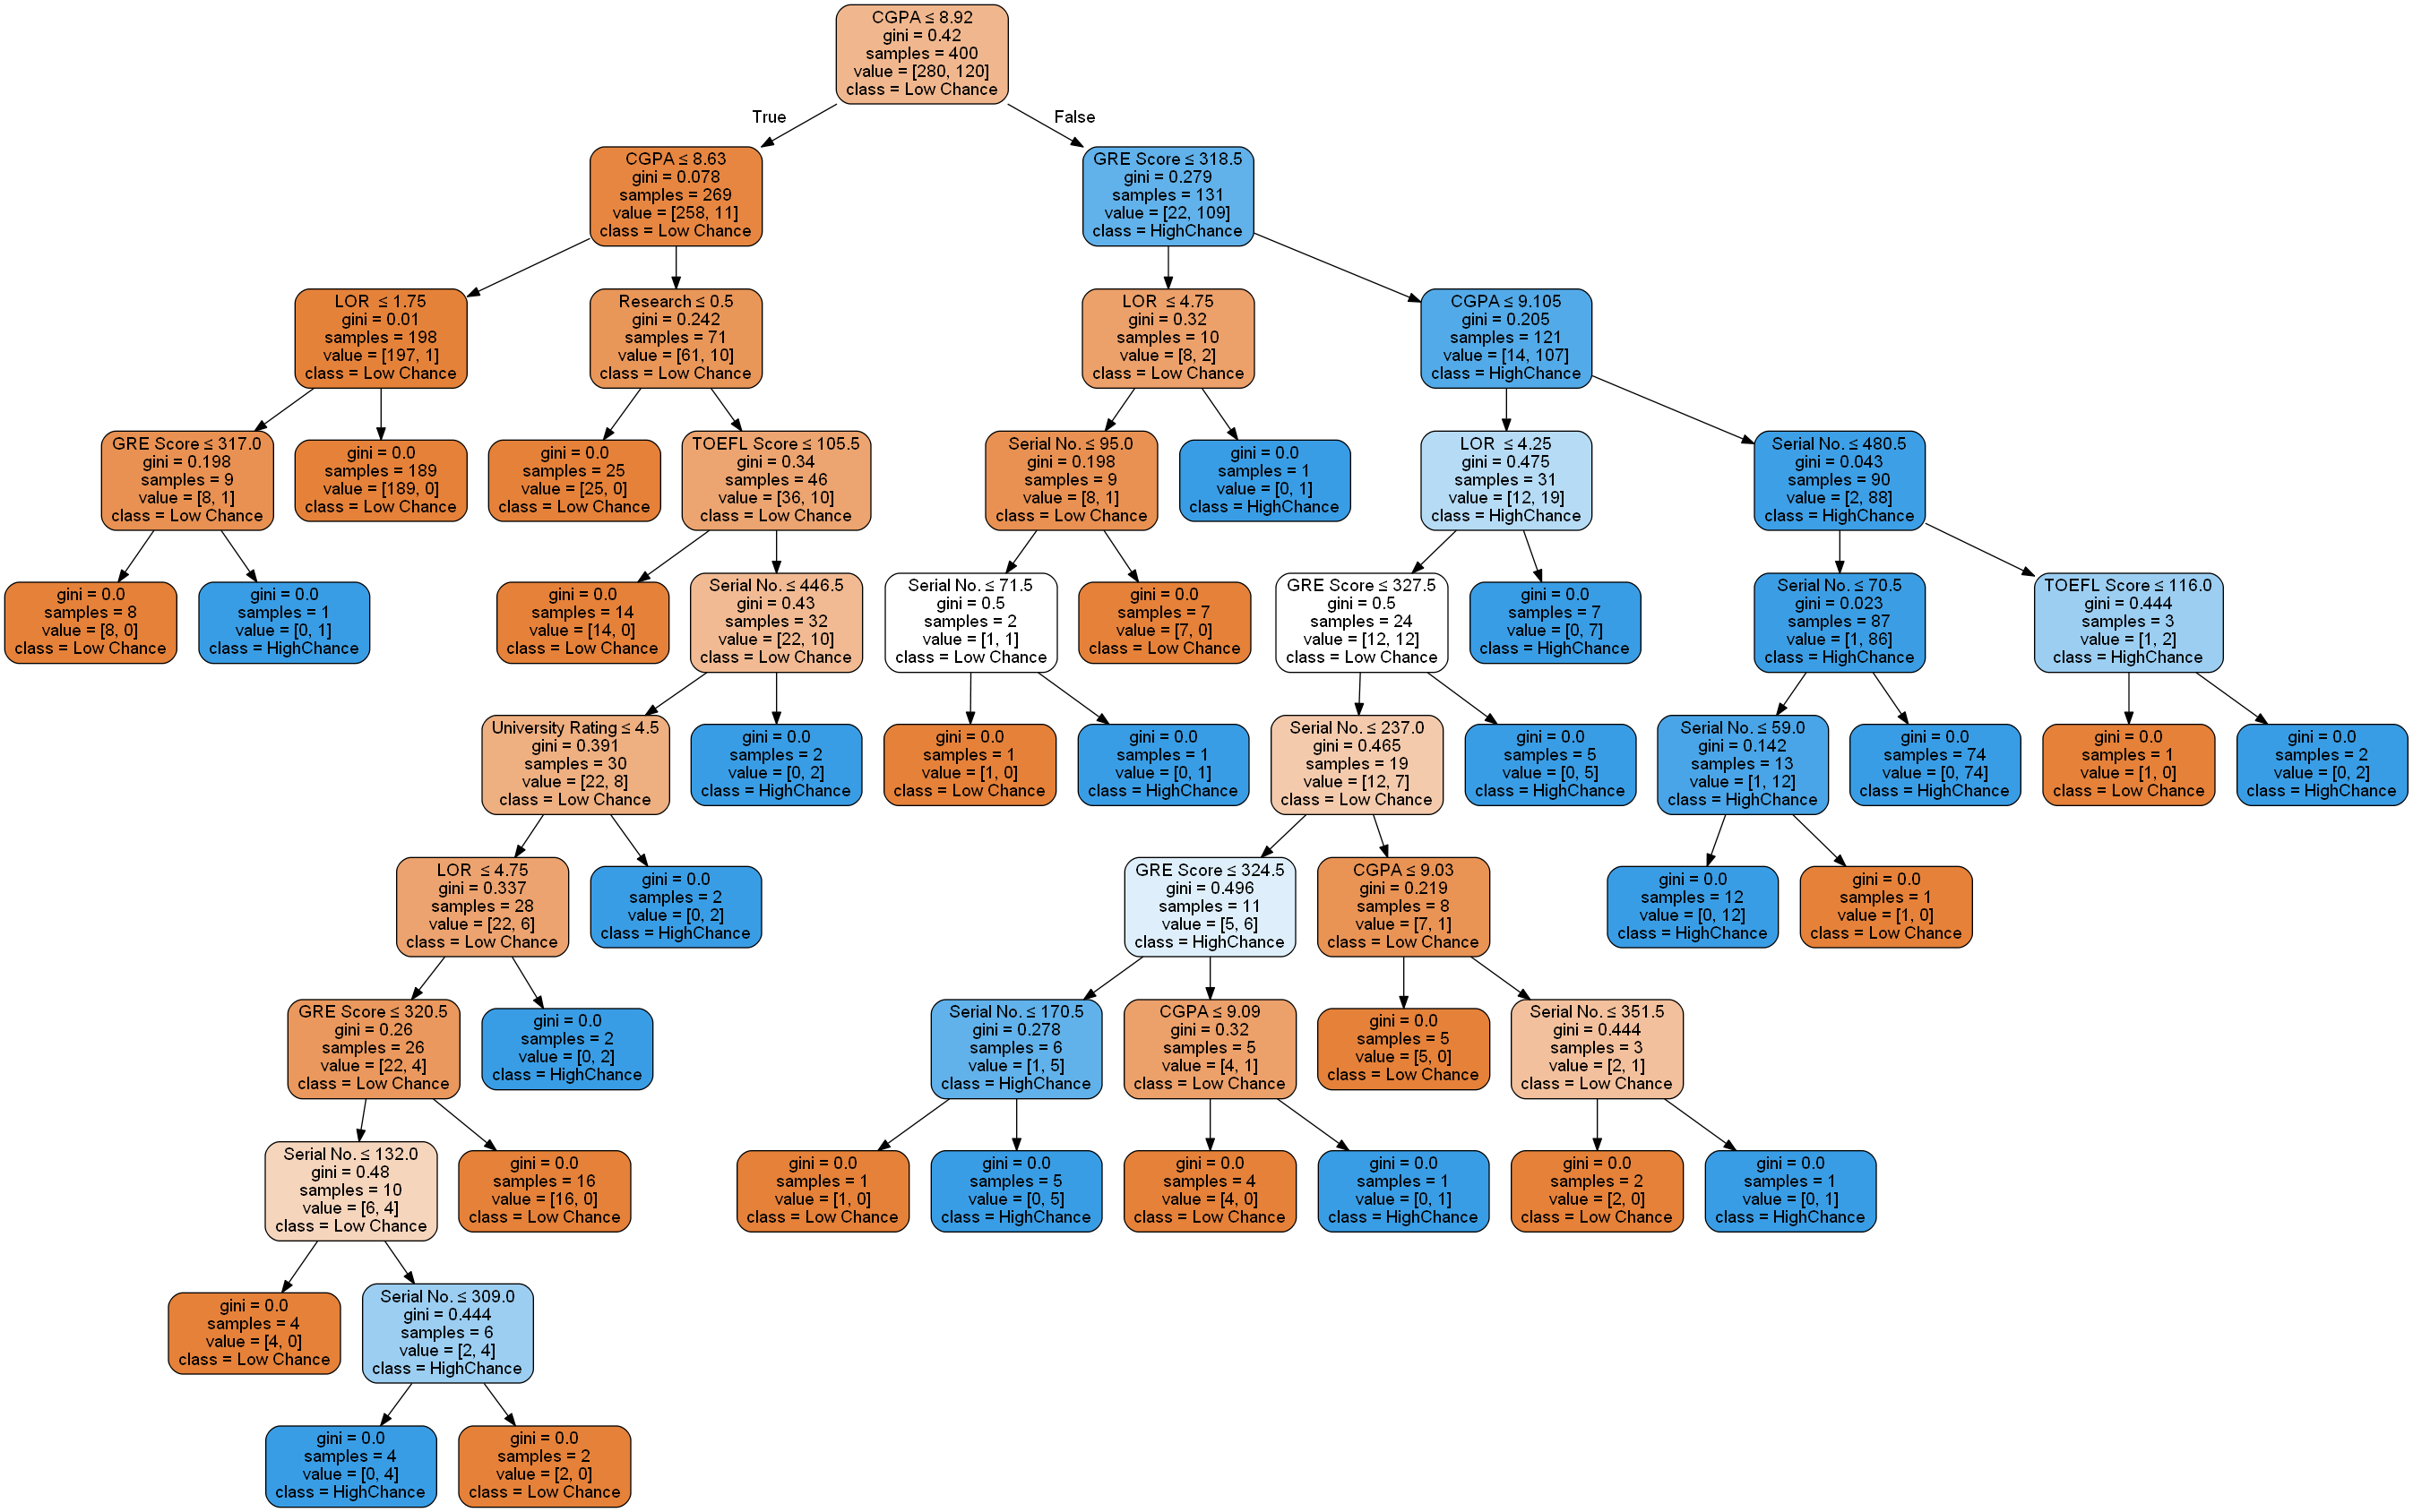

In [79]:
cols=x.columns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = cols,class_names=['Low Chance','HighChance'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png())